In [66]:
# Render our plots inline
%matplotlib inline

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

C:\Users\dsp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cnx = sqlite3.connect('C:\\Users\\dsp\\Dropbox\\Works\\ML\\samsung.sqlite')

In [4]:
# 한 종목씩 select
df = pd.read_sql_query('SELECT * from stocks where code="005930"', cnx)

In [5]:
df

,code,date,ratio,diff,amount,start,ends,high,low,foreigner,insti,person,program,credit
0,005930,20100104,+1.25,+10000,239271,+803000,+809000,+809000,+800000,--16850,+39238,--31413,+26280,0.04
1,005930,20100105,+1.61,+13000,559219,+826000,+822000,+829000,+815000,+132273,--24007,--116719,--52406,0.04
2,005930,20100106,+2.31,+19000,459755,+829000,+841000,+841000,+826000,+151151,--39268,--108343,--9641,0.03
3,005930,20100107,-3.33,-28000,443237,841000,-813000,841000,-813000,+6877,--25451,+13448,+1597,0.03
4,005930,20100108,+0.98,+8000,295798,+820000,+821000,+821000,-806000,+36421,--50166,+15929,--662,0.03
5,005930,20100111,-2.92,-24000,398901,821000,-797000,+823000,-797000,--12184,--41030,+58194,--17792,0.03
6,005930,20100112,+1.51,+12000,384460,797000,+809000,+809000,-795000,+71636,--56909,--8025,--4016,0.03
7,005930,20100113,-1.48,-12000,267619,-805000,-797000,-806000,-797000,--19246,--12360,+33582,--20219,0.03
8,005930,20100114,+3.76,+30000,532705,+806000,+827000,+831000,+800000,+32604,+64377,--97131,--76089,0.03
9,005930,20100115,+1.81,+15000,398401,+832000,+842000,+843000,+829000,+176945,--53228,--106088,--71171,0.03


In [6]:
import stockstats

In [7]:
df = df.rename(columns={'amount':'volume', 'start':'open', 'ends':'close'})

In [8]:
# type 변환 및 +- 제거
df['open'] = df['open'].apply(lambda x: x.replace('+','').replace('-','')).astype(float)
df['close'] = df['close'].apply(lambda x: x.replace('+','').replace('-','')).astype(float)
df['high'] = df['high'].apply(lambda x: x.replace('+','').replace('-','')).astype(float)
df['low'] = df['low'].apply(lambda x: x.replace('+','').replace('-','')).astype(float)
df['volume'] = df['volume'].astype(float)

In [9]:
df

,code,date,ratio,diff,volume,open,close,high,low,foreigner,insti,person,program,credit
0,005930,20100104,+1.25,+10000,239271.0,803000.0,809000.0,809000.0,800000.0,--16850,+39238,--31413,+26280,0.04
1,005930,20100105,+1.61,+13000,559219.0,826000.0,822000.0,829000.0,815000.0,+132273,--24007,--116719,--52406,0.04
2,005930,20100106,+2.31,+19000,459755.0,829000.0,841000.0,841000.0,826000.0,+151151,--39268,--108343,--9641,0.03
3,005930,20100107,-3.33,-28000,443237.0,841000.0,813000.0,841000.0,813000.0,+6877,--25451,+13448,+1597,0.03
4,005930,20100108,+0.98,+8000,295798.0,820000.0,821000.0,821000.0,806000.0,+36421,--50166,+15929,--662,0.03
5,005930,20100111,-2.92,-24000,398901.0,821000.0,797000.0,823000.0,797000.0,--12184,--41030,+58194,--17792,0.03
6,005930,20100112,+1.51,+12000,384460.0,797000.0,809000.0,809000.0,795000.0,+71636,--56909,--8025,--4016,0.03
7,005930,20100113,-1.48,-12000,267619.0,805000.0,797000.0,806000.0,797000.0,--19246,--12360,+33582,--20219,0.03
8,005930,20100114,+3.76,+30000,532705.0,806000.0,827000.0,831000.0,800000.0,+32604,+64377,--97131,--76089,0.03
9,005930,20100115,+1.81,+15000,398401.0,832000.0,842000.0,843000.0,829000.0,+176945,--53228,--106088,--71171,0.03


In [10]:
stock = stockstats.StockDataFrame.retype(df)

In [47]:
stock

,code,ratio,diff,volume,open,close,high,low,foreigner,insti,...,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,change,vr,vr_6_sma,trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
20100104,005930,+1.25,+10000,239271.0,803000.0,809000.0,809000.0,800000.0,--16850,+39238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100105,005930,+1.61,+13000,559219.0,826000.0,822000.0,829000.0,815000.0,+132273,--24007,...,100.000000,100.000000,100.000000,100.000000,100.000000,0.255383,1.606922,inf,NaN,0.255383
20100106,005930,+2.31,+19000,459755.0,829000.0,841000.0,841000.0,826000.0,+151151,--39268,...,100.000000,100.000000,100.000000,100.000000,100.000000,0.327704,2.311436,inf,NaN,0.291543
20100107,005930,-3.33,-28000,443237.0,841000.0,813000.0,841000.0,813000.0,+6877,--25451,...,32.330827,69.579913,69.579913,86.324915,86.324915,0.208476,-3.329370,229.893714,229.893714,0.263854
20100108,005930,+0.98,+8000,295798.0,820000.0,821000.0,821000.0,806000.0,+36421,--50166,...,9.344901,46.313461,46.313461,70.870040,70.870040,0.144691,0.984010,296.629568,263.261641,0.234063
20100111,005930,-2.92,-24000,398901.0,821000.0,797000.0,823000.0,797000.0,--12184,--41030,...,13.058768,34.641992,34.641992,58.155007,58.155007,0.063866,-2.923264,156.123106,227.548796,0.200024
20100112,005930,+1.51,+12000,384460.0,797000.0,809000.0,809000.0,795000.0,+71636,--56909,...,17.398320,28.960694,28.960694,48.536313,48.536313,0.016110,1.505646,201.775956,221.105586,0.169372
20100113,005930,-1.48,-12000,267619.0,805000.0,797000.0,806000.0,797000.0,--19246,--12360,...,17.398320,25.310925,25.310925,41.205007,41.205007,-0.026513,-1.483313,153.117484,207.507966,0.141388
20100114,005930,+3.76,+30000,532705.0,806000.0,827000.0,831000.0,800000.0,+32604,+64377,...,35.871150,28.547439,28.547439,37.325696,37.325696,-0.031480,3.764115,201.119434,206.443210,0.119780


In [58]:
stock['close']

date
20100104     809000.0
20100105     822000.0
20100106     841000.0
20100107     813000.0
20100108     821000.0
20100111     797000.0
20100112     809000.0
20100113     797000.0
20100114     827000.0
20100115     842000.0
20100118     843000.0
20100119     823000.0
20100120     834000.0
20100121     850000.0
20100122     825000.0
20100125     842000.0
20100126     815000.0
20100127     800000.0
20100128     808000.0
20100129     784000.0
20100201     777000.0
20100202     772000.0
20100203     777000.0
20100204     776000.0
20100205     750000.0
20100208     748000.0
20100209     761000.0
20100210     755000.0
20100211     763000.0
20100212     750000.0
              ...    
20170224    1911000.0
20170227    1903000.0
20170228    1922000.0
20170302    1986000.0
20170303    1981000.0
20170306    2004000.0
20170307    2010000.0
20170308    2010000.0
20170309    2010000.0
20170310    2009000.0
20170313    2030000.0
20170314    2068000.0
20170315    2070000.0
20170316    2092000.0
20170

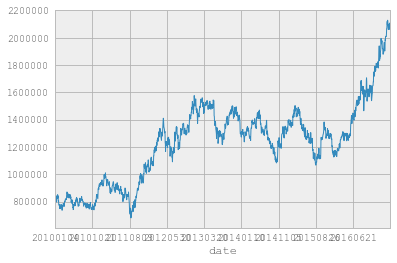

In [67]:
stock['close'].plot()

In [63]:
# CCI, default to 14 days
stock['cci']

date
20100104           NaN
20100105     66.666667
20100106     95.652174
20100107      6.417112
20100108    -39.319249
20100111    -93.670886
20100112    -84.911243
20100113    -93.222683
20100114     33.188153
20100115    132.702419
20100118    116.859531
20100119     67.635190
20100120     61.068790
20100121    100.336700
20100122     32.405425
20100125     58.094681
20100126      1.888751
20100127    -93.152455
20100128    -70.591341
20100129   -152.632414
20100201   -173.251784
20100202   -142.359978
20100203   -114.355005
20100204    -95.850622
20100205   -136.185044
20100208   -123.541483
20100209    -93.133300
20100210    -79.492834
20100211    -61.270724
20100212    -79.738562
               ...    
20170224      6.250962
20170227    -56.727498
20170228      7.802083
20170302    127.875244
20170303    121.964573
20170306    130.053821
20170307    131.125206
20170308    133.461383
20170309    104.181867
20170310     91.941673
20170313    112.805474
20170314    140.740741
201703

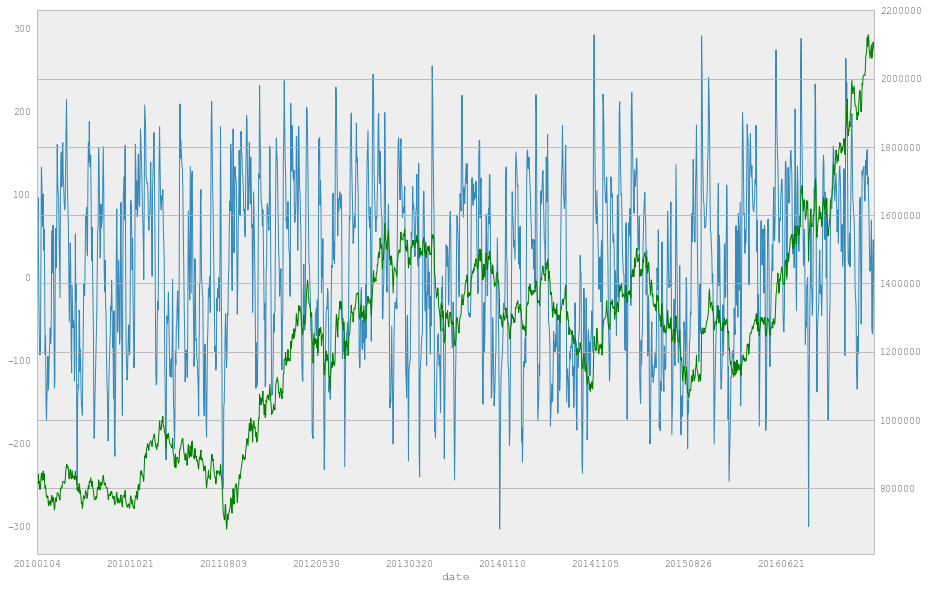

In [74]:
stock['cci'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [32]:
# 20 days CCI
stock['cci_20']

date
20100104           NaN
20100105     66.666667
20100106     95.652174
20100107      6.417112
20100108    -39.319249
20100111    -93.670886
20100112    -84.911243
20100113    -93.222683
20100114     33.188153
20100115    132.702419
20100118    116.859531
20100119     67.635190
20100120     61.068790
20100121    100.336700
20100122     38.283063
20100125     66.425993
20100126      4.793120
20100127    -99.672131
20100128    -76.501852
20100129   -166.557606
20100201   -197.911869
20100202   -156.957279
20100203   -137.265883
20100204   -118.428654
20100205   -170.256410
20100208   -155.498398
20100209   -116.858588
20100210    -97.502617
20100211    -78.597252
20100212    -86.132079
               ...    
20170224    -31.041550
20170227    -79.046181
20170228    -25.261471
20170302     93.490827
20170303    112.658543
20170306    144.631031
20170307    161.101283
20170308    157.796544
20170309    122.541154
20170310    105.944444
20170313    121.458333
20170314    148.666342
201703

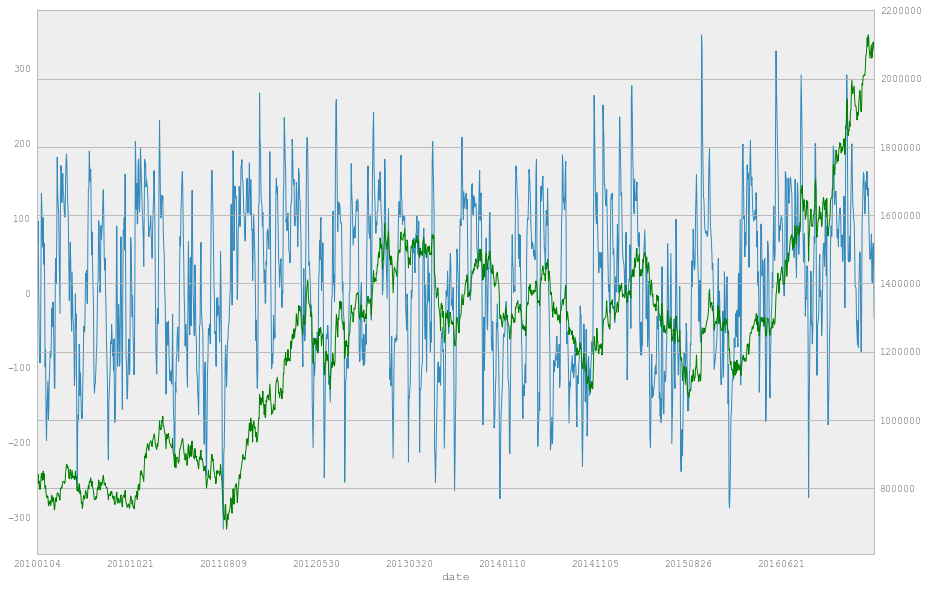

In [75]:
stock['cci_20'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [13]:
stock['volume_delta']

date
20100104         NaN
20100105    319948.0
20100106    -99464.0
20100107    -16518.0
20100108   -147439.0
20100111    103103.0
20100112    -14441.0
20100113   -116841.0
20100114    265086.0
20100115   -134304.0
20100118   -136710.0
20100119    -20383.0
20100120    142998.0
20100121    -44158.0
20100122    130388.0
20100125    -57739.0
20100126    -37587.0
20100127     -4450.0
20100128    -94146.0
20100129    180671.0
20100201     43757.0
20100202   -107239.0
20100203    -63568.0
20100204    -90436.0
20100205    275235.0
20100208    -75426.0
20100209   -102149.0
20100210    -73613.0
20100211      1204.0
20100212    193524.0
              ...   
20170224    -18409.0
20170227     -5263.0
20170228    121100.0
20170302    123222.0
20170303   -170822.0
20170306     -9477.0
20170307    -33632.0
20170308     31754.0
20170309     44626.0
20170310    -82889.0
20170313    -56074.0
20170314     78019.0
20170315    -34744.0
20170316      6906.0
20170317     53383.0
20170320    -47045.0
20170321

In [15]:
# CR indicator, including 5, 10, 20 days moving average
stock['cr']

date
20100104           NaN
20100105           inf
20100106           inf
20100107    204.347826
20100108    119.491525
20100111     92.571429
20100112     83.091787
20100113     77.292576
20100114    117.903930
20100115    148.908297
20100118    140.926641
20100119    128.387097
20100120    123.214286
20100121    127.027027
20100122    111.238532
20100125    112.943633
20100126    104.744526
20100127     92.431562
20100128     95.707472
20100129     84.195804
20100201     76.687898
20100202     80.423940
20100203     80.481928
20100204     81.398104
20100205     73.554604
20100208     71.310630
20100209     74.137931
20100210     69.416499
20100211     65.897693
20100212     67.451382
               ...    
20170224    126.676829
20170227    115.924032
20170228    114.671533
20170302    139.890710
20170303    133.853354
20170306    127.870091
20170307    119.248120
20170308    114.210526
20170309    112.951807
20170310    118.527132
20170313    123.070988
20170314    136.514196
201703

In [16]:
stock['cr-ma1']

date
20100104           NaN
20100105           NaN
20100106           NaN
20100107           NaN
20100108           NaN
20100111           NaN
20100112    204.347826
20100113    161.919676
20100114    138.803593
20100115    124.875642
20100118    115.359029
20100119     98.070250
20100120    103.953604
20100121    113.624646
20100122    122.683708
20100125    131.868050
20100126    133.692669
20100127    126.158717
20100128    120.562115
20100129    115.833601
20100201    109.677056
20100202    103.413145
20100203     98.004599
20100204     90.753452
20100205     85.889335
20100208     83.499408
20100209     80.637535
20100210     78.509295
20100211     77.433841
20100212     76.176639
               ...    
20170224    113.031494
20170227    112.990319
20170228    118.294490
20170302    122.094397
20170303    124.264240
20170306    125.586062
20170307    128.644030
20170308    126.203292
20170309    126.441944
20170310    127.106762
20170313    127.014560
20170314    121.626780
201703

In [17]:
stock['cr-ma2']

date
20100104           NaN
20100105           NaN
20100106           NaN
20100107           NaN
20100108           NaN
20100111           NaN
20100112           NaN
20100113           NaN
20100114    204.347826
20100115    161.919676
20100118    138.803593
20100119    124.875642
20100120    115.359029
20100121    115.783179
20100122    120.515339
20100125    123.066751
20100126    123.657901
20100127    123.613539
20100128    115.881460
20100129    115.056160
20100201    117.093381
20100202    119.258654
20100203    120.772553
20100204    118.552907
20100205    112.081658
20100208    105.657784
20100209    100.861468
20100210     96.588232
20100211     92.025340
20100212     88.256947
               ...    
20170224    140.510646
20170227    133.968355
20170228    128.183489
20170302    125.339800
20170303    125.120943
20170306    123.518610
20170307    121.767774
20170308    119.308778
20170309    120.817175
20170310    122.248891
20170313    124.268171
20170314    125.685501
201703

In [18]:
stock['cr-ma3']

date
20100104           NaN
20100105           NaN
20100106           NaN
20100107           NaN
20100108           NaN
20100111           NaN
20100112           NaN
20100113           NaN
20100114           NaN
20100115           NaN
20100118           NaN
20100119           NaN
20100120    204.347826
20100121    161.919676
20100122    138.803593
20100125    124.875642
20100126    115.359029
20100127    115.783179
20100128    120.515339
20100129    123.066751
20100201    123.657901
20100202    123.613539
20100203    123.923856
20100204    122.866746
20100205    122.103430
20100208    120.863508
20100209    118.968045
20100210    117.514259
20100211    115.554350
20100212    113.395103
               ...    
20170224    155.303298
20170227    154.536880
20170228    154.763486
20170302    154.459906
20170303    152.747701
20170306    150.181165
20170307    148.710351
20170308    146.973211
20170309    146.295207
20170310    144.217446
20170313    141.082064
20170314    138.311523
201703

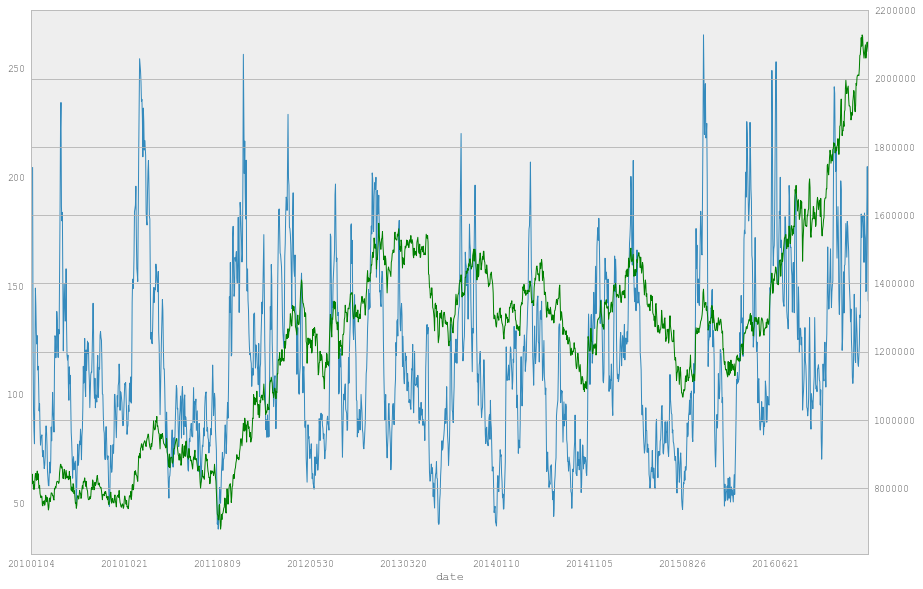

In [76]:
stock['cr'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [19]:
# KDJ, default to 9 days
stock['kdjk']

date
20100104    66.666667
20100105    69.731801
20100106    79.821201
20100107    63.783239
20100108    59.595330
20100111    39.730220
20100112    36.631741
20100113    25.870436
20100114    40.435363
20100115    59.595798
20100118    71.103081
20100119    64.371751
20100120    66.550864
20100121    77.700576
20100122    69.982202
20100125    74.956688
20100126    59.971126
20100127    39.980750
20100128    31.987167
20100129    23.229540
20100201    20.192242
20100202    16.206593
20100203    15.623672
20100204    14.833452
20100205    10.899069
20100208    10.336222
20100209    15.899823
20100210    18.377660
20100211    27.217760
20100212    24.267622
              ...    
20170224    64.374364
20170227    56.088286
20170228    54.351255
20170302    67.758718
20170303    74.802108
20170306    81.349554
20170307    86.039651
20170308    85.898580
20170309    85.804533
20170310    85.513524
20170313    86.148089
20170314    88.842316
20170315    90.600760
20170316    89.905011
20170

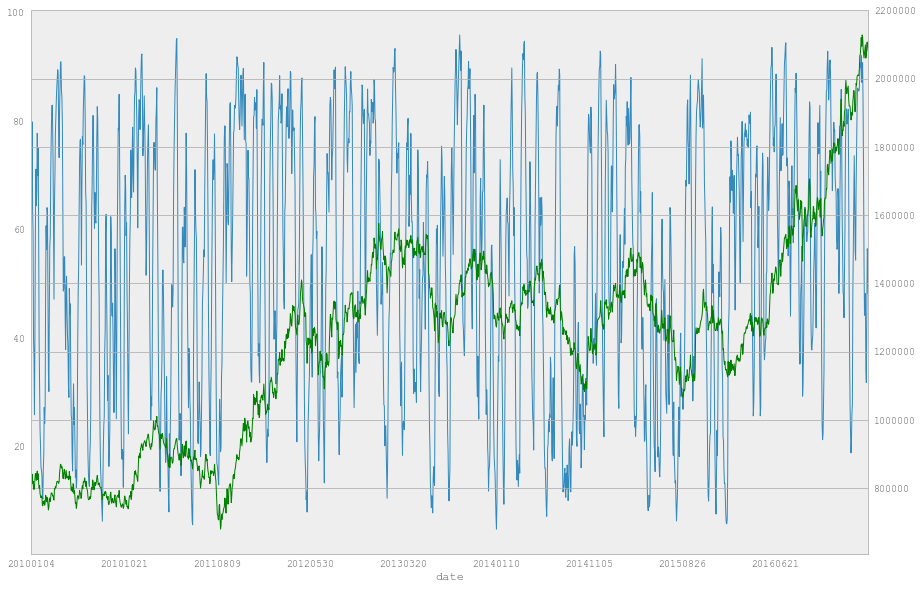

In [77]:
stock['kdjk'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [20]:
stock['kdjd']

date
20100104    55.555556
20100105    60.280971
20100106    66.794381
20100107    65.790667
20100108    63.725555
20100111    55.727110
20100112    49.361987
20100113    41.531470
20100114    41.166101
20100115    47.309333
20100118    55.240582
20100119    58.284305
20100120    61.039825
20100121    66.593409
20100122    67.723007
20100125    70.134234
20100126    66.746531
20100127    57.824604
20100128    49.212125
20100129    40.551263
20100201    33.764923
20100202    27.912146
20100203    23.815988
20100204    20.821810
20100205    17.514229
20100208    15.121560
20100209    15.380981
20100210    16.379874
20100211    19.992503
20100212    21.417543
              ...    
20170224    60.383942
20170227    58.952057
20170228    57.418456
20170302    60.865210
20170303    65.510843
20170306    70.790413
20170307    75.873492
20170308    79.215188
20170309    81.411637
20170310    82.778933
20170313    83.901985
20170314    85.548762
20170315    87.232761
20170316    88.123511
20170

In [21]:
# MACD
stock['macd']

date
20100104        0.000000
20100105      291.666667
20100106      960.830088
20100107      230.701889
20100108      147.442703
20100111     -931.632845
20100112    -1063.987232
20100113    -1706.345115
20100114     -636.793899
20100115      903.821826
20100118     2057.695410
20100119     1777.043952
20100120     2166.701881
20100121     3357.523833
20100122     2729.203296
20100125     3249.178822
20100126     1934.527710
20100127      -41.779131
20100128    -1046.891034
20100129    -3373.369607
20100201    -5593.554002
20100202    -7581.176580
20100203    -8693.106004
20100204    -9522.857273
20100205   -11863.275033
20100208   -13686.576593
20100209   -14025.788471
20100210   -14555.833599
20100211   -14223.425079
20100212   -14743.034470
                ...     
20170224    15415.921275
20170227    12314.902677
20170228    11260.658445
20170302    15411.770133
20170303    18089.572508
20170306    21816.174682
20170307    24965.892343
20170308    27149.108262
20170309    28550.21

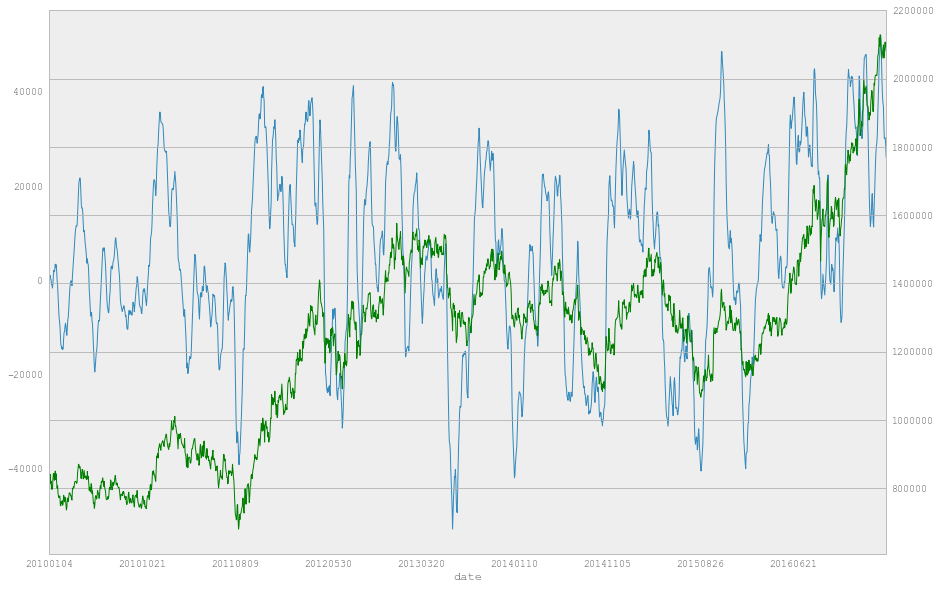

In [78]:
stock['macd'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [22]:
# MACD signal line
stock['macds']

date
20100104        0.000000
20100105      162.037037
20100106      489.411238
20100107      401.772570
20100108      326.115184
20100111      -14.804461
20100112     -280.324631
20100113     -623.024169
20100114     -626.205045
20100115     -283.390208
20100118      228.825948
20100119      561.318246
20100120      901.073199
20100121     1414.964504
20100122     1687.397652
20100125     2008.800574
20100126     1993.603800
20100127     1579.059447
20100128     1046.189891
20100129      151.968319
20100201    -1007.833429
20100202    -2332.274711
20100203    -3611.995105
20100204    -4799.776679
20100205    -6217.833617
20100208    -7716.110476
20100209    -8981.104643
20100210   -10098.211233
20100211   -10924.532673
20100212   -11689.179619
                ...     
20170224    18440.117938
20170227    17215.074886
20170228    16024.191598
20170302    15901.707305
20170303    16339.280345
20170306    17434.659213
20170307    18940.905839
20170308    20582.546323
20170309    22176.07

In [23]:
# MACD histogram
stock['macdh']

date
20100104        0.000000
20100105      259.259259
20100106      942.837700
20100107     -342.141361
20100108     -357.344963
20100111    -1833.656768
20100112    -1567.325203
20100113    -2166.641891
20100114      -21.177708
20100115     2374.424068
20100118     3657.738923
20100119     2431.451413
20100120     2531.257364
20100121     3885.118658
20100122     2083.611288
20100125     2480.756497
20100126     -118.152181
20100127    -3241.677156
20100128    -4186.161850
20100129    -7050.675851
20100201    -9171.441147
20100202   -10497.803739
20100203   -10162.221798
20100204    -9446.161188
20100205   -11290.882832
20100208   -11940.932234
20100209   -10089.367654
20100210    -8915.244733
20100211    -6597.784812
20100212    -6107.709702
                ...     
20170224    -6048.393326
20170227    -9800.344419
20170228    -9527.066306
20170302     -979.874344
20170303     3500.584325
20170306     8763.030938
20170307    12049.973009
20170308    13133.123877
20170309    12748.26

In [24]:
# bolling, including upper band and lower band
stock['boll']

date
20100104    8.090000e+05
20100105    8.155000e+05
20100106    8.240000e+05
20100107    8.212500e+05
20100108    8.212000e+05
20100111    8.171667e+05
20100112    8.160000e+05
20100113    8.136250e+05
20100114    8.151111e+05
20100115    8.178000e+05
20100118    8.200909e+05
20100119    8.203333e+05
20100120    8.213846e+05
20100121    8.234286e+05
20100122    8.235333e+05
20100125    8.246875e+05
20100126    8.241176e+05
20100127    8.227778e+05
20100128    8.220000e+05
20100129    8.201000e+05
20100201    8.185000e+05
20100202    8.160000e+05
20100203    8.128000e+05
20100204    8.109500e+05
20100205    8.074000e+05
20100208    8.049500e+05
20100209    8.025500e+05
20100210    8.004500e+05
20100211    7.972500e+05
20100212    7.926500e+05
                ...     
20170224    1.935700e+06
20170227    1.931100e+06
20170228    1.928550e+06
20170302    1.930050e+06
20170303    1.930700e+06
20170306    1.932250e+06
20170307    1.933850e+06
20170308    1.937300e+06
20170309    1.941800

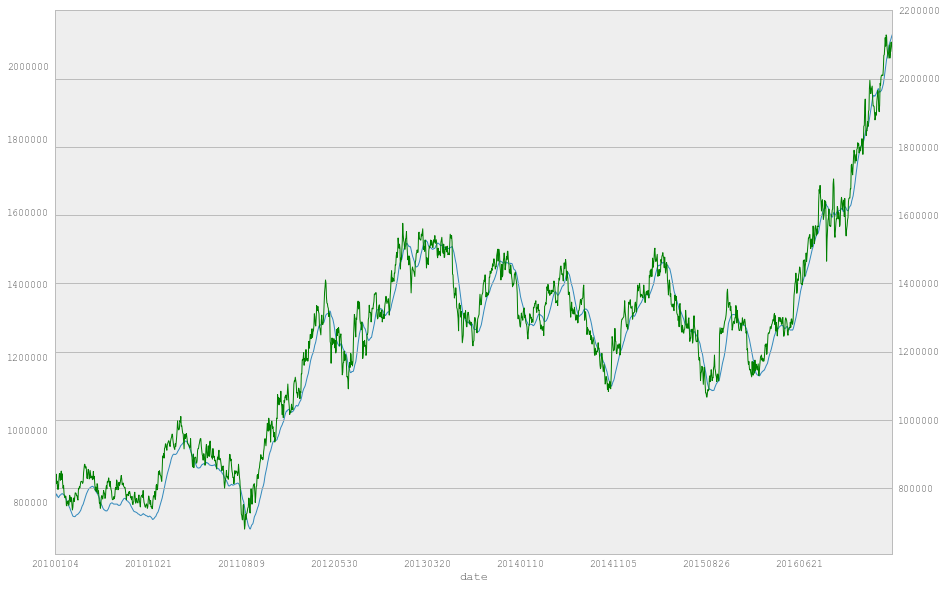

In [79]:
stock['boll'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [25]:
stock['boll_ub']

date
20100104             NaN
20100105    8.338848e+05
20100106    8.561870e+05
20100107    8.497398e+05
20100108    8.458739e+05
20100111    8.467887e+05
20100112    8.437369e+05
20100113    8.426065e+05
20100114    8.436496e+05
20100115    8.496301e+05
20100118    8.538957e+05
20100119    8.526087e+05
20100120    8.532022e+05
20100121    8.576110e+05
20100122    8.564824e+05
20100125    8.578314e+05
20100126    8.565513e+05
20100127    8.562340e+05
20100128    8.552131e+05
20100129    8.566219e+05
20100201    8.595878e+05
20100202    8.619840e+05
20100203    8.603399e+05
20100204    8.612563e+05
20100205    8.643077e+05
20100208    8.676656e+05
20100209    8.682173e+05
20100210    8.694656e+05
20100211    8.670131e+05
20100212    8.621210e+05
                ...     
20170224    2.004766e+06
20170227    1.995643e+06
20170228    1.990083e+06
20170302    1.995724e+06
20170303    1.998188e+06
20170306    2.005044e+06
20170307    2.012081e+06
20170308    2.022623e+06
20170309    2.032599

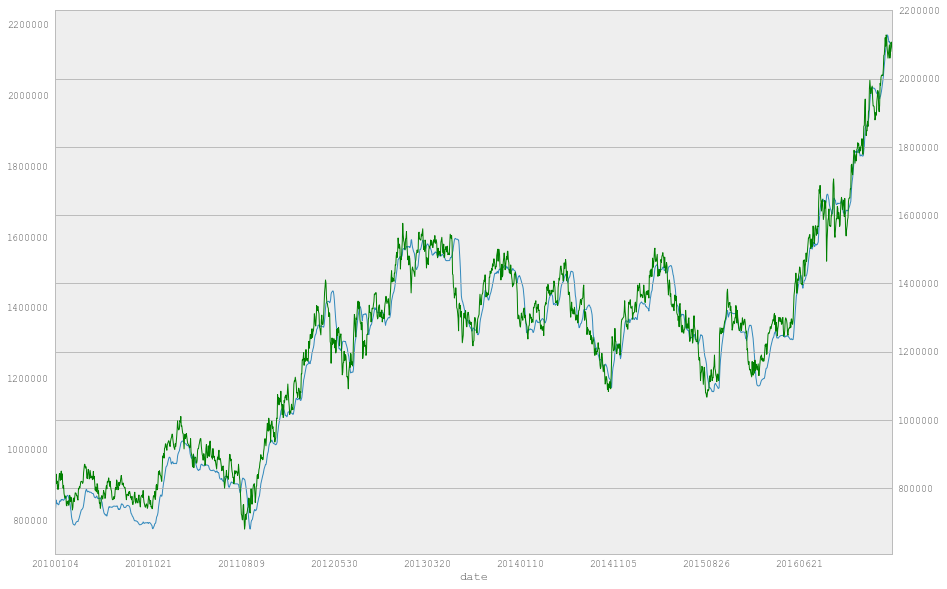

In [80]:
stock['boll_ub'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [26]:
stock['boll_lb']

date
20100104             NaN
20100105    7.971152e+05
20100106    7.918130e+05
20100107    7.927602e+05
20100108    7.965261e+05
20100111    7.875446e+05
20100112    7.882631e+05
20100113    7.846435e+05
20100114    7.865726e+05
20100115    7.859699e+05
20100118    7.862861e+05
20100119    7.880580e+05
20100120    7.895670e+05
20100121    7.892461e+05
20100122    7.905843e+05
20100125    7.915436e+05
20100126    7.916840e+05
20100127    7.893215e+05
20100128    7.887869e+05
20100129    7.835781e+05
20100201    7.774122e+05
20100202    7.700160e+05
20100203    7.652601e+05
20100204    7.606437e+05
20100205    7.504923e+05
20100208    7.422344e+05
20100209    7.368827e+05
20100210    7.314344e+05
20100211    7.274869e+05
20100212    7.231790e+05
                ...     
20170224    1.866634e+06
20170227    1.866557e+06
20170228    1.867017e+06
20170302    1.864376e+06
20170303    1.863212e+06
20170306    1.859456e+06
20170307    1.855619e+06
20170308    1.851977e+06
20170309    1.851001

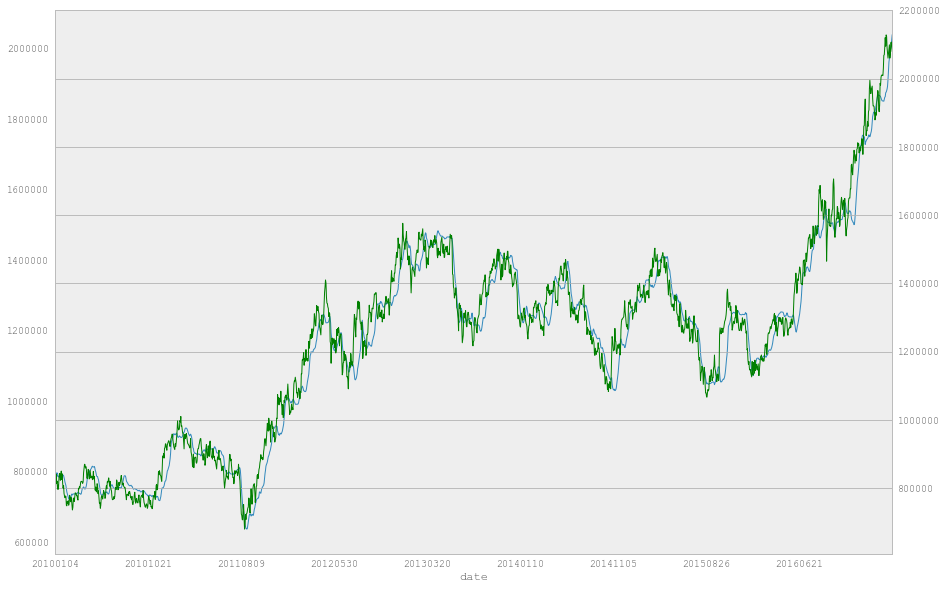

In [81]:
stock['boll_lb'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [28]:
# 6 days RSI
stock['rsi_6']

C:\Users\dsp\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


date
20100104           NaN
20100105    100.000000
20100106    100.000000
20100107     47.031004
20100108     55.172107
20100111     35.519188
20100112     46.873697
20100113     38.696713
20100114     59.757358
20100115     66.634879
20100118     67.084898
20100119     50.679651
20100120     57.533689
20100121     65.823681
20100122     48.186289
20100125     57.482572
20100126     42.835155
20100127     36.615104
20100128     42.004815
20100129     32.160162
20100201     29.722079
20100202     27.908564
20100203     32.826903
20100204     32.298065
20100205     21.494376
20100208     20.850576
20100209     35.840018
20100210     32.437686
20100211     41.346545
20100212     32.889642
               ...    
20170224     41.808511
20170227     38.846994
20170228     49.118897
20170302     69.694771
20170303     67.149038
20170306     72.661297
20170307     74.025663
20170308     74.025663
20170309     74.025663
20170310     72.976773
20170313     80.087016
20170314     87.327368
201703

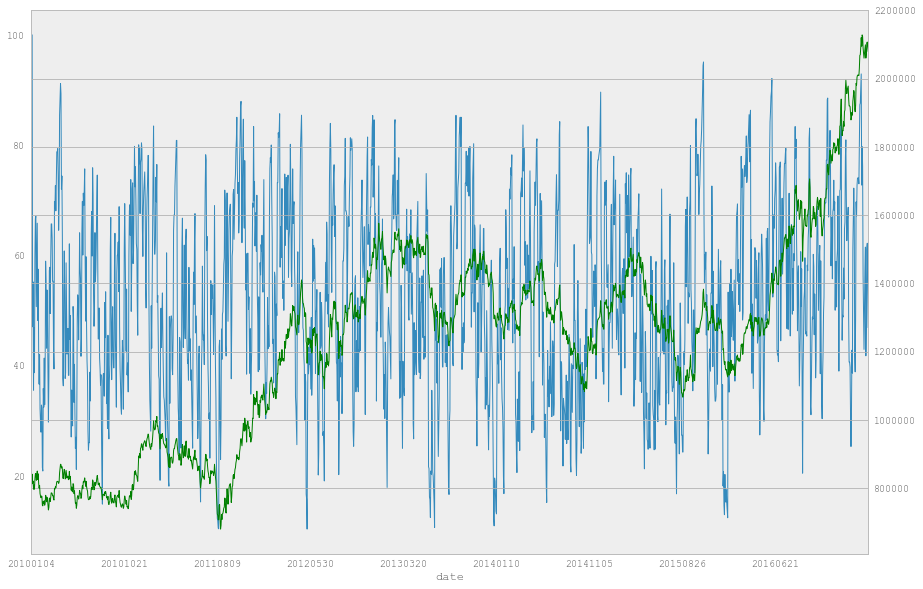

In [82]:
stock['rsi_6'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [29]:
# 12 days RSI
stock['rsi_12']

date
20100104           NaN
20100105    100.000000
20100106    100.000000
20100107     50.301984
20100108     56.967798
20100111     39.589592
20100112     48.207484
20100113     41.715528
20100114     57.371756
20100115     62.819406
20100118     63.161785
20100119     52.594769
20100120     56.919236
20100121     62.366702
20100122     51.307987
20100125     56.968270
20100126     47.417791
20100127     43.044340
20100128     45.945059
20100129     39.381093
20100201     37.668775
20100202     36.434341
20100203     38.628372
20100204     38.339645
20100205     31.633288
20100208     31.175674
20100209     37.578764
20100210     35.897232
20100211     39.814487
20100212     35.922968
               ...    
20170224     48.736655
20170227     47.019921
20170228     51.450722
20170302     62.863384
20170303     61.628672
20170306     65.071347
20170307     65.940975
20170308     65.940975
20170309     65.940975
20170310     65.587639
20170313     69.350081
20170314     74.790913
201703

In [30]:
# 10 days WR
stock['wr_10']

date
20100104      0.000000
20100105     24.137931
20100106      0.000000
20100107     68.292683
20100108     48.780488
20100111    100.000000
20100112     69.565217
20100113     95.652174
20100114     30.434783
20100115      2.083333
20100118      5.882353
20100119     49.090909
20100120     29.090909
20100121      0.000000
20100122     45.454545
20100125     14.545455
20100126     66.037736
20100127    100.000000
20100128     84.000000
20100129     94.285714
20100201     85.882353
20100202     91.764706
20100203     85.882353
20100204     86.746988
20100205     97.029703
20100208     93.333333
20100209     73.684211
20100210     81.081081
20100211     63.333333
20100212     81.632653
               ...    
20170224     54.032258
20170227     60.483871
20170228     45.161290
20170302      5.426357
20170303      9.302326
20170306      5.555556
20170307      4.580153
20170308     14.383562
20170309     14.383562
20170310     15.068493
20170313     11.585366
20170314      5.027933
201703

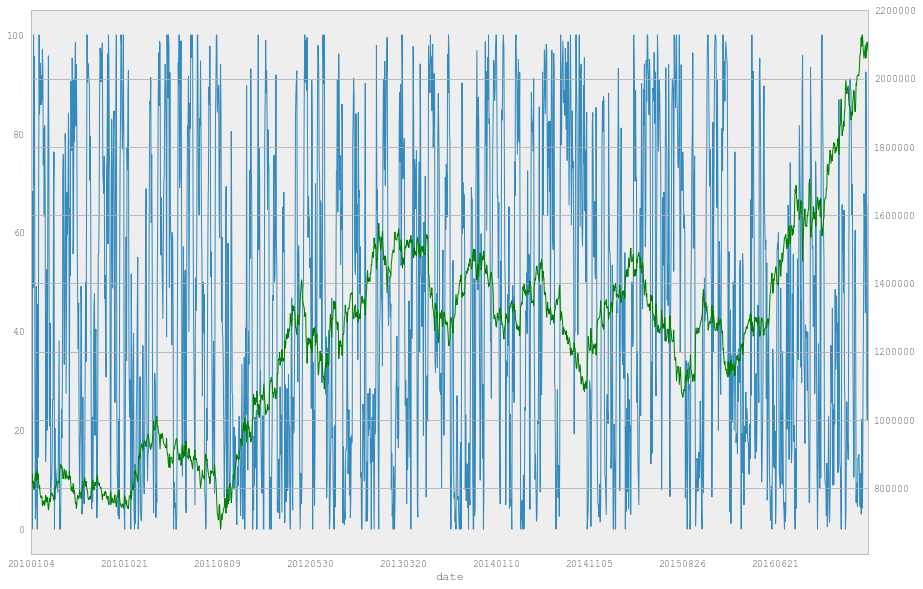

In [83]:
stock['wr_10'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [31]:
# 6 days WR
stock['wr_6']

date
20100104      0.000000
20100105     24.137931
20100106      0.000000
20100107     68.292683
20100108     48.780488
20100111    100.000000
20100112     69.565217
20100113     95.652174
20100114     30.434783
20100115      2.083333
20100118      5.882353
20100119     49.090909
20100120     30.188679
20100121      0.000000
20100122     78.125000
20100125     22.857143
20100126     92.105263
20100127    100.000000
20100128     84.000000
20100129     94.117647
20100201     85.542169
20100202     91.358025
20100203     76.923077
20100204     78.000000
20100205     94.444444
20100208     85.714286
20100209     59.183673
20100210     68.181818
20100211     47.619048
20100212     65.384615
               ...    
20170224     58.771930
20170227     80.645161
20170228     60.215054
20170302      6.481481
20170303     11.111111
20170306      5.555556
20170307      4.580153
20170308     15.789474
20170309     19.090909
20170310     30.136986
20170313     21.590909
20170314     10.344828
201703

In [33]:
# TR (true range)
stock['tr']

date
20100104        NaN
20100105    20000.0
20100106    19000.0
20100107    28000.0
20100108    15000.0
20100111    26000.0
20100112    14000.0
20100113    12000.0
20100114    34000.0
20100115    16000.0
20100118    18000.0
20100119    28000.0
20100120    14000.0
20100121    30000.0
20100122    32000.0
20100125    33000.0
20100126    34000.0
20100127    17000.0
20100128    15000.0
20100129    28000.0
20100201    20000.0
20100202    20000.0
20100203    17000.0
20100204    11000.0
20100205    29000.0
20100208    13000.0
20100209    19000.0
20100210    12000.0
20100211    10000.0
20100212    22000.0
             ...   
20170224    56000.0
20170227    26000.0
20170228    40000.0
20170302    72000.0
20170303    28000.0
20170306    50000.0
20170307    26000.0
20170308    24000.0
20170309    14000.0
20170310    28000.0
20170313    47000.0
20170314    52000.0
20170315    32000.0
20170316    39000.0
20170317    39000.0
20170320    33000.0
20170321    46000.0
20170322    49000.0
20170323    380

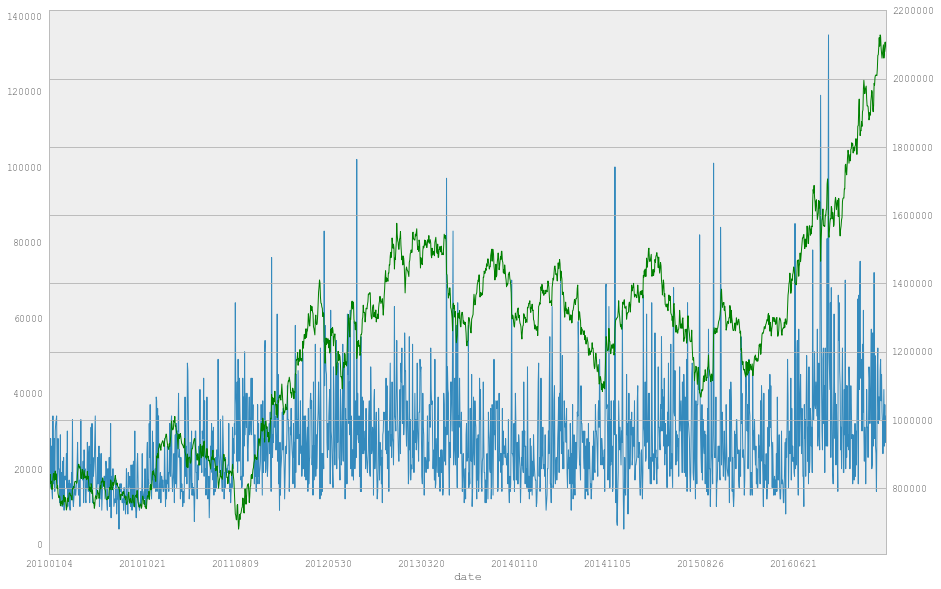

In [84]:
stock['tr'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [34]:
# DMA, difference of 10 and 50 moving average
stock['dma']

date
20100104         0.000000
20100105         0.000000
20100106         0.000000
20100107         0.000000
20100108         0.000000
20100111         0.000000
20100112         0.000000
20100113         0.000000
20100114         0.000000
20100115         0.000000
20100118      1109.090909
20100119       966.666667
20100120      -784.615385
20100121       871.428571
20100122      1166.666667
20100125      4512.500000
20100126      5682.352941
20100127      7322.222222
20100128      6200.000000
20100129      2300.000000
20100201     -2247.619048
20100202     -5254.545455
20100203     -9260.869565
20100204    -15066.666667
20100205    -20060.000000
20100208    -27069.230769
20100209    -30737.037037
20100210    -33414.285714
20100211    -36493.103448
20100212    -38133.333333
                ...      
20170224     42180.000000
20170227     40160.000000
20170228     41200.000000
20170302     47340.000000
20170303     51620.000000
20170306     58880.000000
20170307     62480.000000
2017030

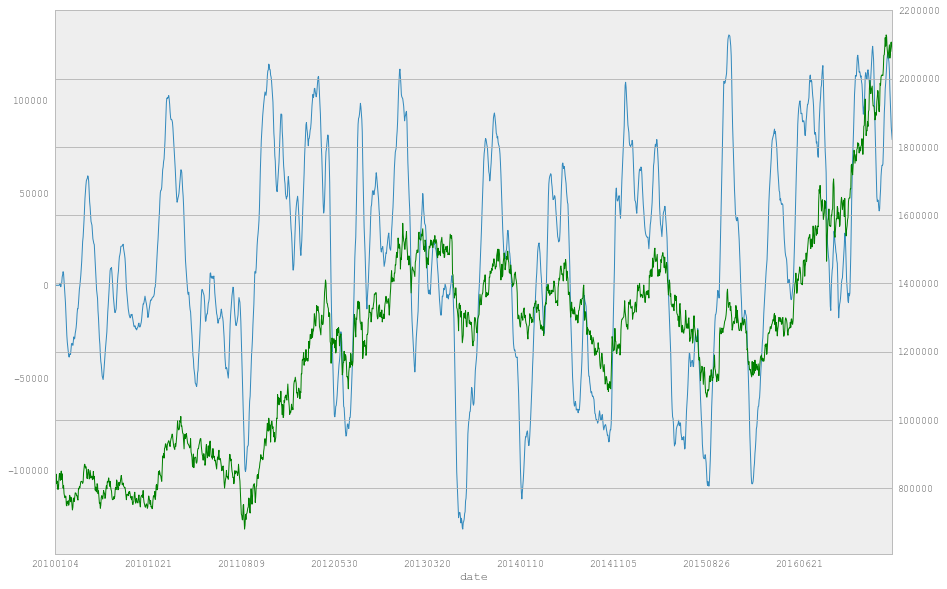

In [85]:
stock['dma'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [35]:
# DMI
# +DI, default to 14 days
stock['pdi']

date
20100104          NaN
20100105    53.571429
20100106    57.518382
20100107    34.514231
20100108    28.127984
20100111    20.342081
20100112    17.277552
20100113    14.969452
20100114    32.544414
20100115    38.139346
20100118    34.757795
20100119    27.710356
20100120    24.327397
20100121    28.869169
20100122    23.231533
20100125    18.853862
20100126    15.405282
20100127    13.605807
20100128    12.102213
20100129    10.185586
20100201     8.880383
20100202    10.778417
20100203     9.504035
20100204     8.575679
20100205     7.180469
20100208     6.422750
20100209    10.116635
20100210    11.067887
20100211    10.677853
20100212     9.139801
              ...    
20170224    25.347266
20170227    22.447265
20170228    30.616834
20170302    43.572678
20170303    38.544552
20170306    41.208484
20170307    38.336618
20170308    39.509441
20170309    35.837677
20170310    31.536843
20170313    37.091399
20170314    41.232558
20170315    36.083497
20170316    44.529701
20170

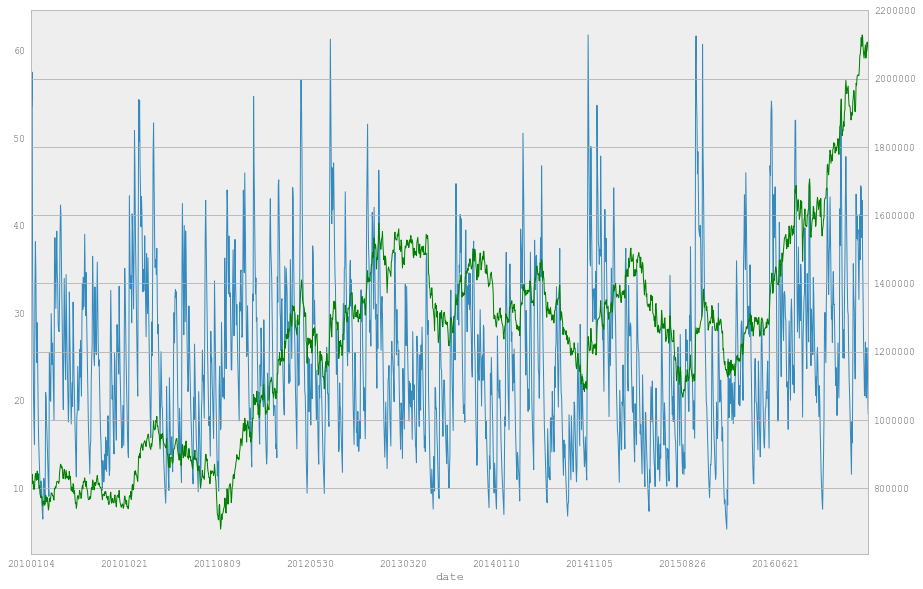

In [86]:
stock['pdi'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [37]:
# -DI, default to 14 days
stock['mdi']

date
20100104          NaN
20100105     0.000000
20100106     0.000000
20100107    17.649323
20100108    23.320202
20100111    26.452933
20100112    24.555864
20100113    21.275458
20100114    15.360405
20100115    13.140264
20100118    11.109825
20100119    13.478311
20100120    11.832840
20100121     9.481077
20100122     8.969063
20100125     7.278963
20100126     7.721391
20100127    14.050071
20100128    12.497381
20100129    24.330883
20100201    30.275318
20100202    26.388778
20100203    24.505098
20100204    22.111435
20100205    34.059540
20100208    34.316040
20100209    29.911602
20100210    26.804317
20100211    24.177524
20100212    28.241235
              ...    
20170224    32.814934
20170227    35.671277
20170228    30.691959
20170302    24.877961
20170303    22.007136
20170306    18.665858
20170307    16.574569
20170308    14.756495
20170309    15.636590
20170310    16.808181
20170313    14.218655
20170314    11.938736
20170315    10.447844
20170316     9.013474
20170

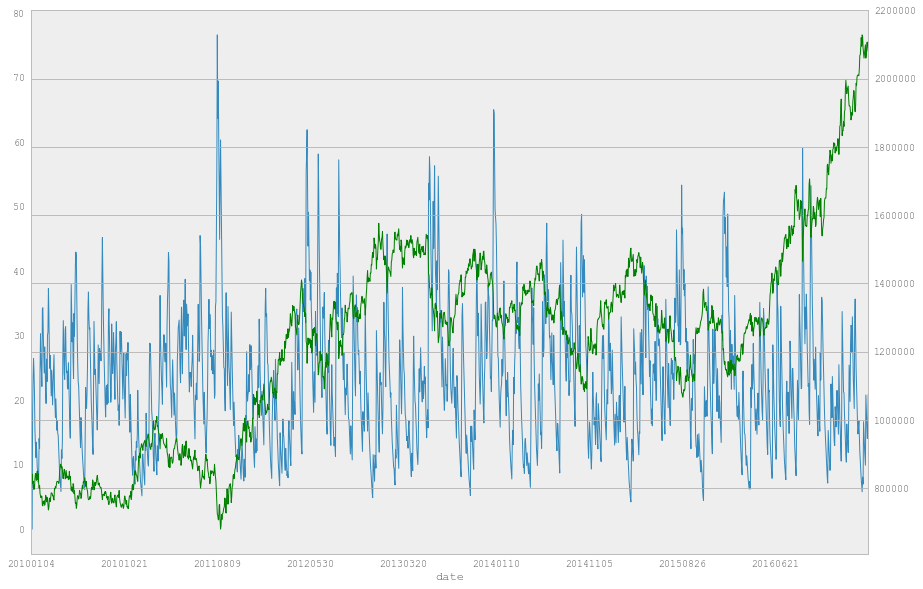

In [87]:
stock['mdi'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [38]:
# DX, default to 14 days of +DI and -DI
stock['dx']

date
20100104           NaN
20100105    100.000000
20100106    100.000000
20100107     32.330827
20100108      9.344901
20100111     13.058768
20100112     17.398320
20100113     17.398320
20100114     35.871150
20100115     48.750531
20100118     51.557002
20100119     34.553304
20100120     34.553304
20100121     50.555324
20100122     44.292567
20100125     44.292567
20100126     33.225232
20100127      1.606401
20100128      1.606401
20100129     40.981296
20100201     54.640664
20100202     42.000373
20100203     44.108922
20100204     44.108922
20100205     65.177170
20100208     68.468626
20100209     49.452509
20100210     41.551399
20100211     38.730526
20100212     51.099264
               ...    
20170224     12.839383
20170227     22.753515
20170228      0.122536
20170302     27.311238
20170303     27.311238
20170306     37.649894
20170307     39.631357
20170308     45.614150
20170309     39.245020
20170310     30.465725
20170313     44.577510
20170314     55.093303
201703

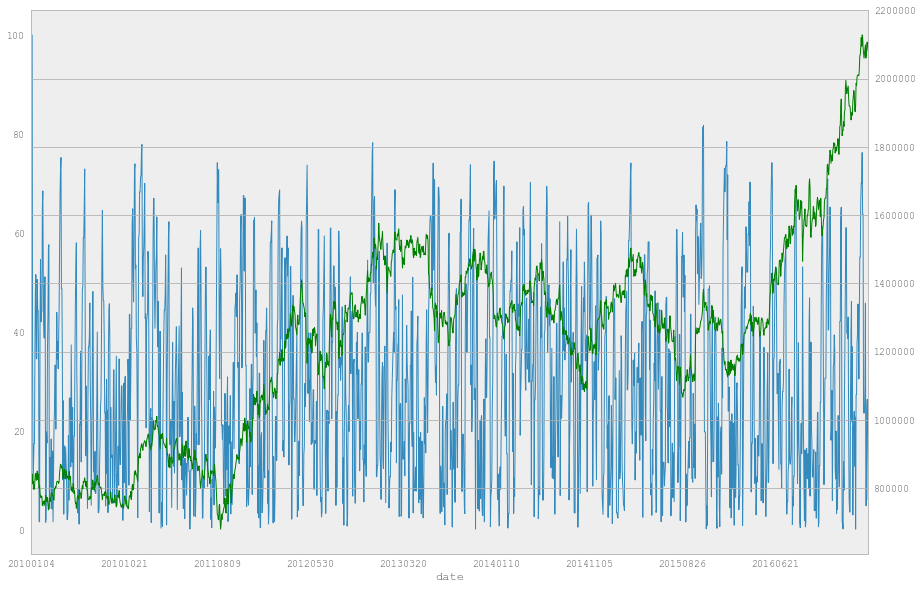

In [88]:
stock['dx'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [40]:
# ADX, 6 days SMA of DX, same as stock['dx_6_ema']
stock['adx']

date
20100104           NaN
20100105    100.000000
20100106    100.000000
20100107     69.579913
20100108     46.313461
20100111     34.641992
20100112     28.960694
20100113     25.310925
20100114     28.547439
20100115     34.613343
20100118     39.627744
20100119     38.141195
20100120     37.097677
20100121     40.991781
20100122     41.943427
20100125     42.618952
20100126     39.922652
20100127     28.939130
20100128     21.111442
20100129     26.798058
20100201     34.762608
20100202     36.832307
20100203     38.912609
20100204     40.397917
20100205     47.479907
20100208     53.478017
20100209     52.327689
20100210     49.248400
20100211     46.243050
20100212     47.630620
               ...    
20170224     19.738984
20170227     20.600279
20170228     14.749495
20170302     18.338565
20170303     20.902186
20170306     25.687245
20170307     29.671277
20170308     34.226384
20170309     35.660280
20170310     34.176121
20170313     37.147947
20170314     42.275191
201703

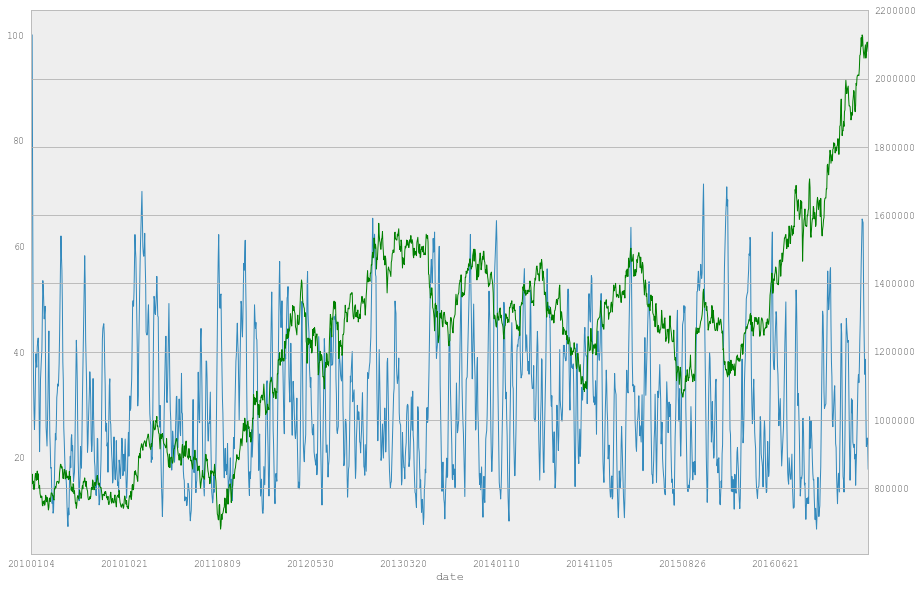

In [89]:
stock['adx'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [41]:
# ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
stock['adxr']

date
20100104           NaN
20100105    100.000000
20100106    100.000000
20100107     86.324915
20100108     70.870040
20100111     58.155007
20100112     48.536313
20100113     41.205007
20100114     37.325696
20100115     36.511322
20100118     37.433613
20100119     37.640898
20100120     37.482905
20100121     38.498233
20100122     39.491513
20100125     40.390848
20100126     40.256461
20100127     37.012298
20100128     32.458529
20100129     30.838541
20100201     31.961044
20100202     33.354023
20100203     34.943159
20100204     36.502341
20100205     39.639764
20100208     43.594429
20100209     46.090043
20100210     46.992533
20100211     46.778377
20100212     47.021889
               ...    
20170224     22.704197
20170227     22.103078
20170228     20.002054
20170302     19.526771
20170303     19.919747
20170306     21.567604
20170307     23.882939
20170308     26.838209
20170309     29.358801
20170310     30.735178
20170313     32.567398
20170314     35.341053
201703

In [42]:
# TRIX, default to 12 days
stock['trix']

C:\Users\dsp\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


date
20100104         NaN
20100105    0.255383
20100106    0.327704
20100107    0.208476
20100108    0.144691
20100111    0.063866
20100112    0.016110
20100113   -0.026513
20100114   -0.031480
20100115   -0.009228
20100118    0.021985
20100119    0.039629
20100120    0.055973
20100121    0.079461
20100122    0.089637
20100125    0.100960
20100126    0.097119
20100127    0.077158
20100128    0.053503
20100129    0.017441
20100201   -0.026559
20100202   -0.074346
20100203   -0.118428
20100204   -0.157422
20100205   -0.202379
20100208   -0.248161
20100209   -0.284625
20100210   -0.314951
20100211   -0.334887
20100212   -0.352101
              ...   
20170224    0.085644
20170227    0.076510
20170228    0.067821
20170302    0.071883
20170303    0.082172
20170306    0.099622
20170307    0.121032
20170308    0.142986
20170309    0.163298
20170310    0.180487
20170313    0.197950
20170314    0.220833
20170315    0.245000
20170316    0.271524
20170317    0.301889
20170320    0.326704
20170321

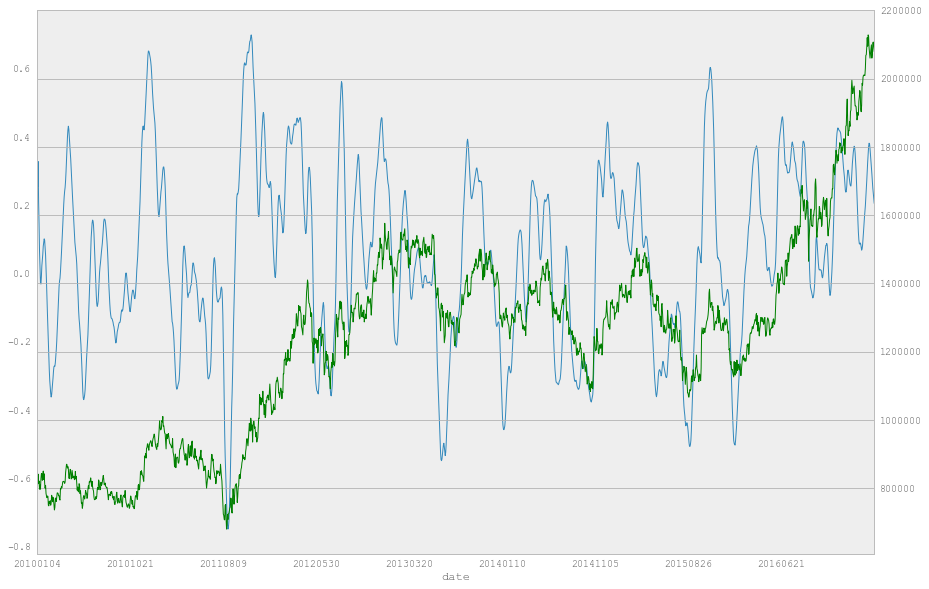

In [90]:
stock['trix'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [45]:
# MATRIX is the simple moving average of TRIX
stock['trix_9_sma']

date
20100104         NaN
20100105    0.255383
20100106    0.291543
20100107    0.263854
20100108    0.234063
20100111    0.200024
20100112    0.169372
20100113    0.141388
20100114    0.119780
20100115    0.105445
20100118    0.079512
20100119    0.047504
20100120    0.030559
20100121    0.023312
20100122    0.026175
20100125    0.035603
20100126    0.049340
20100127    0.061411
20100128    0.068381
20100129    0.067876
20100201    0.060522
20100202    0.046042
20100203    0.024054
20100204   -0.003397
20100205   -0.037102
20100208   -0.075466
20100209   -0.115664
20100210   -0.156603
20100211   -0.195751
20100212   -0.231922
              ...   
20170224    0.126072
20170227    0.109177
20170228    0.095781
20170302    0.086803
20170303    0.082613
20170306    0.082777
20170307    0.086583
20170308    0.092965
20170309    0.101219
20170310    0.111757
20170313    0.125250
20170314    0.142251
20170315    0.161487
20170316    0.182526
20170317    0.205000
20170320    0.227852
20170321

In [43]:
# VR, default to 26 days
stock['vr']

date
20100104           NaN
20100105           inf
20100106           inf
20100107    229.893714
20100108    296.629568
20100111    156.123106
20100112    201.775956
20100113    153.117484
20100114    201.119434
20100115    237.019275
20100118    260.600203
20100119    214.055504
20100120    242.500176
20100121    267.676463
20100122    198.533213
20100125    221.194433
20100126    183.414959
20100127    156.929643
20100128    167.703016
20100129    142.350380
20100201    122.121911
20100202    109.852614
20100203    118.277619
20100204    111.458805
20100205     99.178421
20100208     90.653114
20100209     97.251660
20100210     82.082165
20100211     78.461759
20100212     78.238638
               ...    
20170224     94.777903
20170227     94.683234
20170228     98.260808
20170302    118.539261
20170303    103.801973
20170306    104.534109
20170307    102.756020
20170308     93.604316
20170309    104.605208
20170310    107.280995
20170313    102.321530
20170314    102.933670
201703

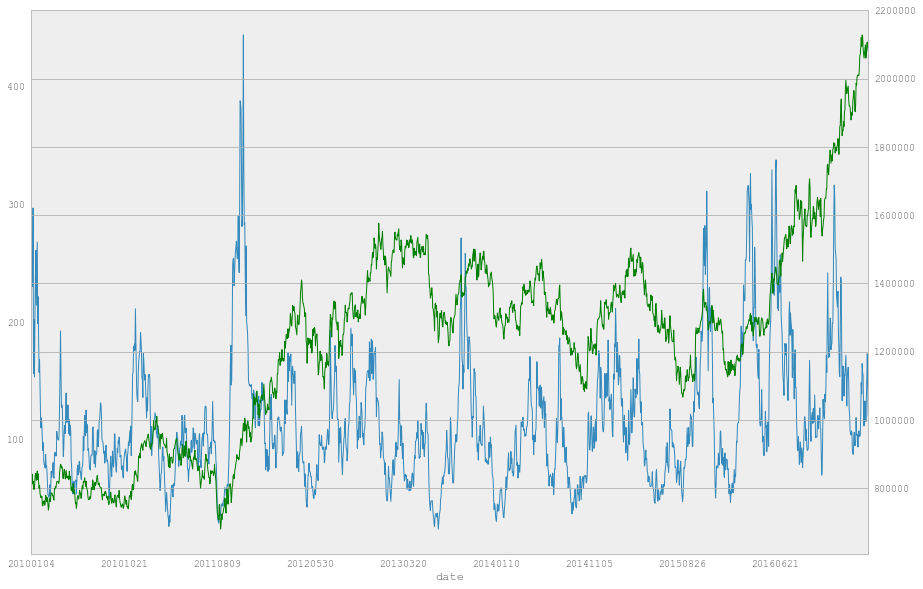

In [91]:
stock['vr'].plot(figsize=(15, 10))
stock['close'].plot(secondary_y=True, style='g')

In [44]:
# MAVR is the simple moving average of VR
stock['vr_6_sma']

date
20100104           NaN
20100105           NaN
20100106           NaN
20100107    229.893714
20100108    263.261641
20100111    227.548796
20100112    221.105586
20100113    207.507966
20100114    206.443210
20100115    207.630804
20100118    201.625910
20100119    211.281310
20100120    218.068680
20100121    237.161843
20100122    236.730806
20100125    234.093332
20100126    221.229125
20100127    211.708148
20100128    199.241954
20100129    178.354274
20100201    165.619057
20100202    147.062087
20100203    136.205864
20100204    128.627391
20100205    117.206625
20100208    108.590414
20100209    104.445372
20100210     99.816964
20100211     93.180988
20100212     87.644293
               ...    
20170224     94.777433
20170227     95.454100
20170228     97.167812
20170302    102.368880
20170303    102.703831
20170306    102.432881
20170307    103.762567
20170308    103.582748
20170309    104.640148
20170310    102.763770
20170313    102.517029
20170314    102.250290
201703